In [63]:
%pylab inline
from skimage import data, color, transform, morphology
from scipy.fftpack import dct, idct
from scipy.signal import gaussian, convolve2d

Populating the interactive namespace from numpy and matplotlib


# Transformata Fouriera w obrazach

Zobaczmy jak to działa na kilku przykładach. Wiadomo, że transformata Fouriera 1D dobrze rozpoznaje sygnał sinusoidalny (jako pojedyńcy punkt na spektrogramie). Zobaczmy czy tak samo będzie z tranformatą 2D. Wygnereuj taki sygnał i narysuj jego widmo amplitudowe i fazowe:

\begin{equation}
I_{x,y}=A\cdot\sin(2\cdot\pi\cdot f\cdot x/W+\phi)\hspace{1cm}\text{, dla }x\in[0,W-1]\text{ i }y\in[0,H-1]
\end{equation}

Możesz najpierw założyć jednostkową amplitudę i zerową fazę oraz $f$ ustawić na 100, a póżniej zobaczyć co się stanie jak zmienisz parametry. Załóż że W i H są 512 pikseli. Zaleca się użycia polecenia *numpy.meshgrid* do wygenerowania wartości współrzędnych X i Y z powyższego wzoru (najlepiej jako liczby rzeczywiste).

In [4]:
print( meshgrid(arange(0,3),arange(0,3)) )

[array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]]), array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2]])]


[[  0   1   2 ..., 509 510 511]
 [  0   1   2 ..., 509 510 511]
 [  0   1   2 ..., 509 510 511]
 ..., 
 [  0   1   2 ..., 509 510 511]
 [  0   1   2 ..., 509 510 511]
 [  0   1   2 ..., 509 510 511]]
[[  0   0   0 ...,   0   0   0]
 [  1   1   1 ...,   1   1   1]
 [  2   2   2 ...,   2   2   2]
 ..., 
 [509 509 509 ..., 509 509 509]
 [510 510 510 ..., 510 510 510]
 [511 511 511 ..., 511 511 511]]


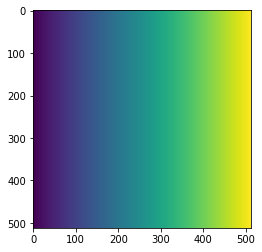

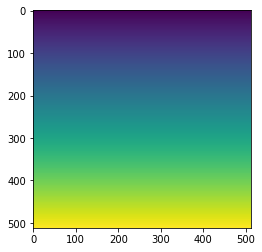

In [15]:
W = H = 512
x,y = meshgrid( arange(W), arange(H) )
print(x)
print(y)
imshow(x)
figure()
imshow(y)

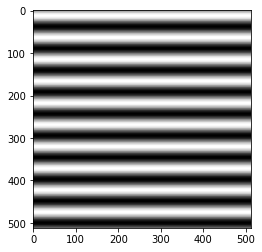

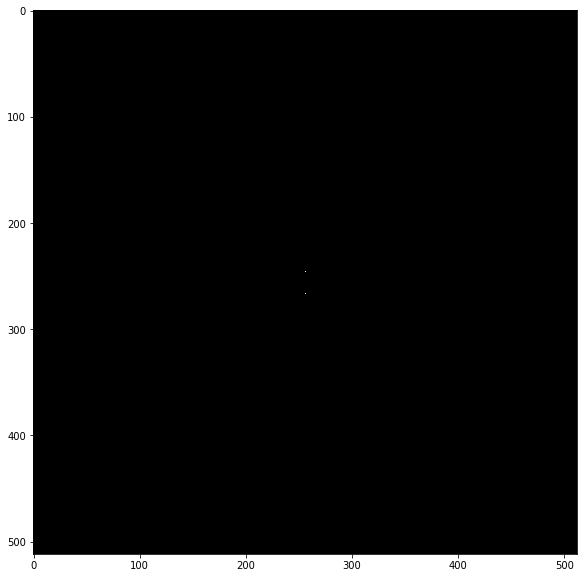

In [21]:
W = H = 512
x,y = meshgrid( arange(W), arange(H) )
A = 1
f = 10
# растояние меж крапками 20 (10+10)
ph = 0

I = A * sin( 2 * pi * f * x/W + ph)

imshow(I, cmap=cm.gray)

figure(figsize=(10,10))

H = fft.fft2( I )

#фишка, что б увидеть пункты
H = fft.fftshift(H)


# imshow(abs(H), cmap=cm.gray)
imshow(abs(H), cmap=cm.gray)

A teraz zrób to samo ale dla $y$ zamiast $x$:

\begin{equation}
I_{x,y}=A\cdot\sin(2\cdot\pi\cdot f\cdot y/H+\phi)\hspace{1cm}\text{, dla }x\in[0,W-1]\text{ i }y\in[0,H-1]
\end{equation}

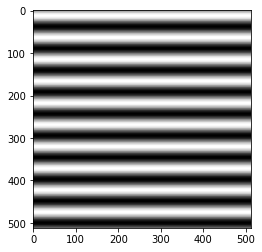

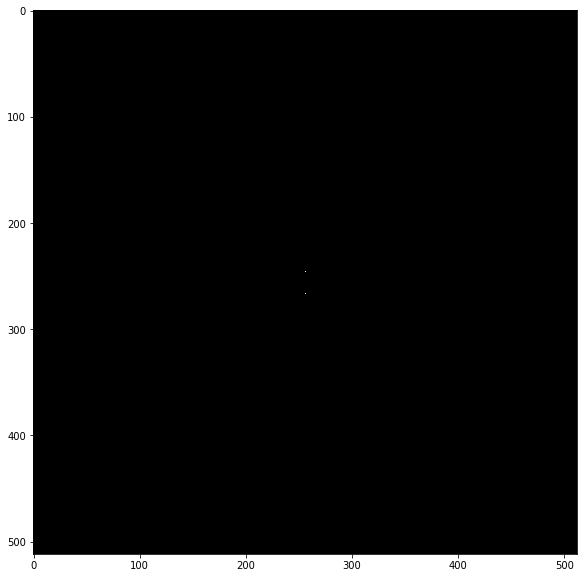

In [22]:
W = H = 512
x,y = meshgrid( arange(W), arange(H) )
A = 1
f = 10
# растояние меж крапками 20 (10+10)
ph = 0

I = A * sin( 2 * pi * f * y/W + ph)

imshow(I, cmap=cm.gray)

figure(figsize=(10,10))

H = fft.fft2( I )

#фишка, что б увидеть пункты
H = fft.fftshift(H)


# imshow(abs(H), cmap=cm.gray)
imshow(abs(H), cmap=cm.gray)

Teraz zrób to samo dla sumy $x$ i $y$:

\begin{equation}
I_{x,y}=A\cdot \sin(2\cdot\pi\cdot f\frac{x/W+y/H}{2}+\phi)\hspace{1cm}\text{, dla }x\in[0,W]\text{ i }y\in[0,H]
\end{equation}

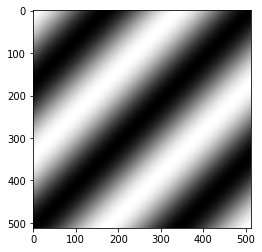

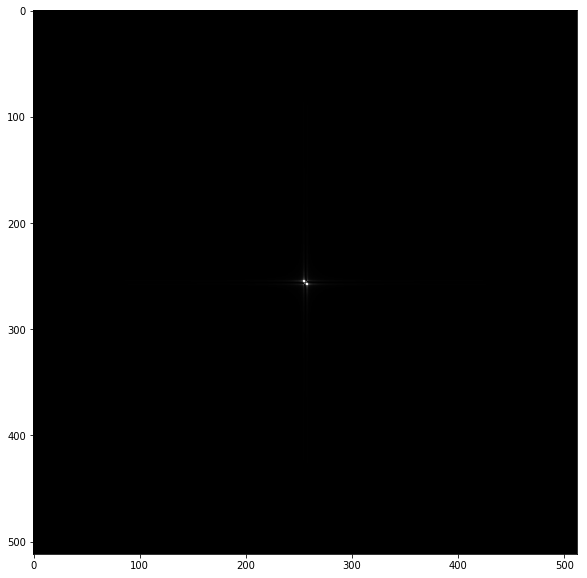

In [24]:
W = H = 512.0
x,y = meshgrid( arange(W), arange(H) )
A = 1
f = 3
# растояние меж крапками 20 (10+10)
ph = 0

I = A * cos( 2 * pi * f * (x/W+y/H)/2 + ph)

imshow(I, cmap=cm.gray)

figure(figsize=(10,10))

H = fft.fft2( I )

#фишка, что б увидеть пункты
H = fft.fftshift(H)


# imshow(abs(H), cmap=cm.gray)
imshow(abs(H), cmap=cm.gray)

Spróbuj zdefniować obszar wartości widma 2D i określić co w nim oznaczają poszczególne punkty. Jaka występuje symetria?

Zrób przykładowe widmo jakiegoś obrazu i dokonaj odwrotnej transformaty Fouriera.

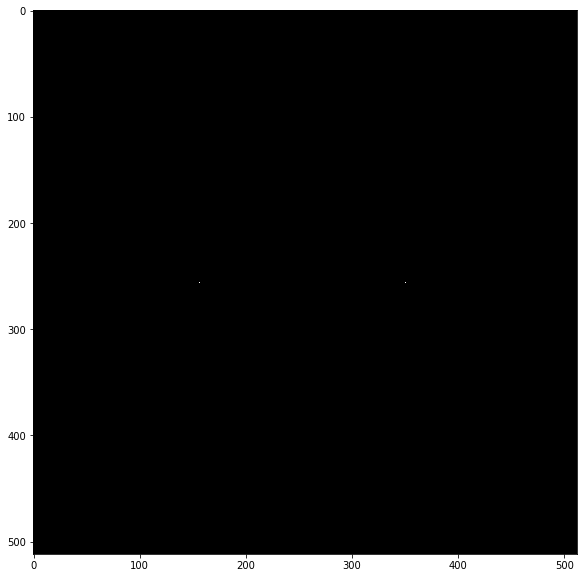

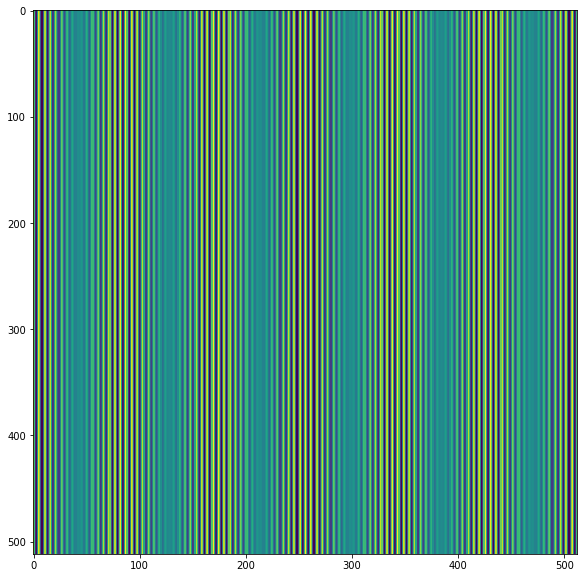

In [43]:
H=zeros( (512,512) )

# H[276,256]=1e10
# H[236,256]=1e10

H[256,350]=1e10
H[256,156]=1e10


figure(figsize=(10,10))
imshow(H,cmap=cm.gray)

#! ! ! ! ! !
H = fft.fftshift(H)
I = fft.ifft2(H)
I = real(I)

figure(figsize=(10,10))
imshow(I)

Wczytaj przykładowy obraz natuarlny i narysuj jego widmo. Zauważ, że taki obraz może mieć dosyć duże przesunięcie DC, więc jego składowa widma $(0,0)$ będzie bardzo wysoka. Najlepiej obejrzeć widmo w skali logarytmicznej.

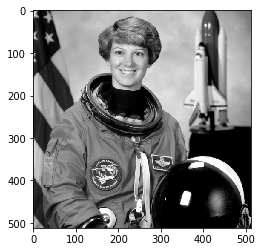

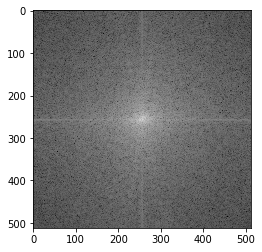

In [32]:
i = data.astronaut()
i = color.rgb2gray(i)

imshow(i, cmap=cm.gray)

I = fft.fft2(i)
I = fft.fftshift(I)

figure()
imshow( log(abs(I)),cmap=cm.gray )

Dokonaj zmian w widmie maskując jego poszczególne części: najpierw górne, potem dolne częstotliwości i narysuj co z tego wyjdzie.

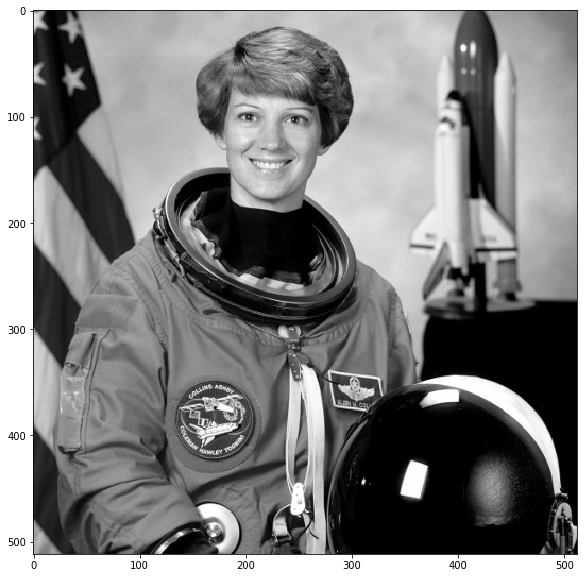

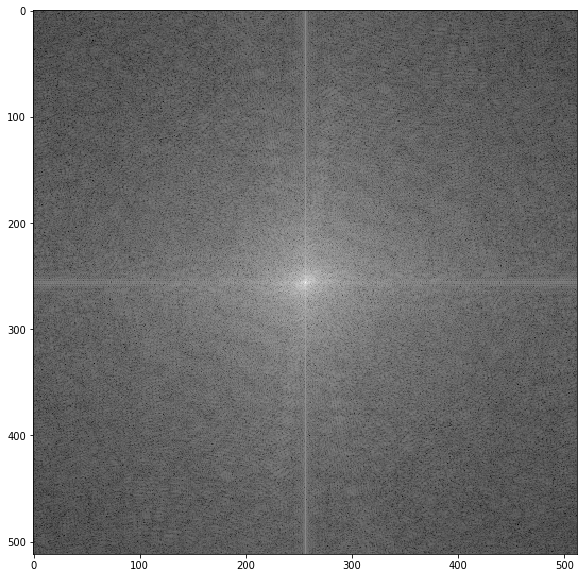

In [56]:
i = data.astronaut()
i = color.rgb2gray(i)

imshow(i, cmap=cm.gray)

I = fft.fft2(i)
I = fft.fftshift(I)

figure()
imshow( log(abs(I)),cmap=cm.gray )


/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


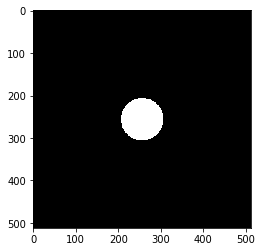

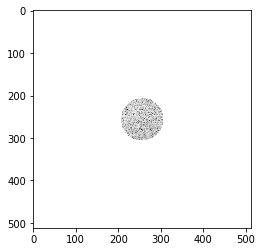

In [65]:

# mask
L = 50
d = morphology.disk(L)
m = zeros(I.shape)
M = int(I.shape[0]/2)
m[M-L:M+L+1, M-L:M+L+1] = d

# m=1-m
I = I*m

# figure(figsize(10,10))
figure()
imshow(m, cmap=cm.gray)

figure()
imshow( log(abs(I)),cmap=cm.gray )

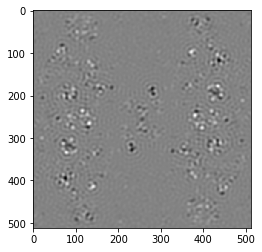

In [66]:
I = fft.fftshift(I)
i = fft.ifft2(I)
# фишка
i = real(i)
# i = float(i)

figure()
imshow(i, cmap=cm.gray)

# Dyskretrna transformata kosinusowa

Narysuj wynik DCT na przykładowym obrazie naturalnym. Ponieważ *numpy* nie ma implementacji DCT, do jej policzenia użyj metody *scipy.fftpack.dct*. Metoda ta niestety liczy tylko 1D wersję transformaty, ale możemty zastosować pewną zależność transfotmaty żeby otrzymać poprawną wersję 2D:

  * policz DCT z obrazu
  * dokonaj transpozycji wyniku
  * policz DCT z powyższej transpozycji
  * dokonaj jeszcze jednej transpozycji wyniku

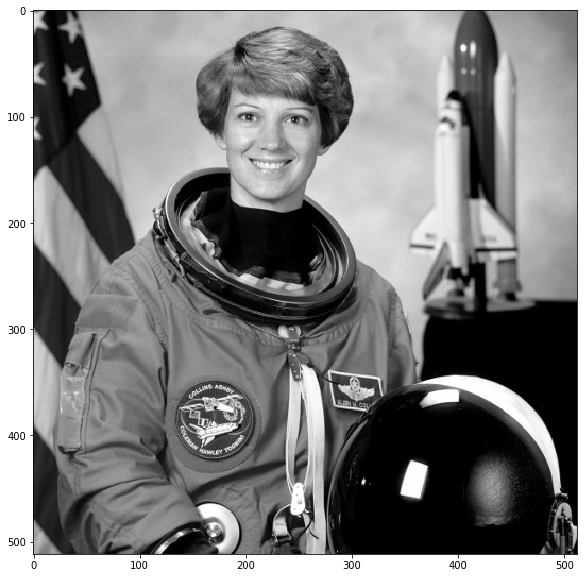

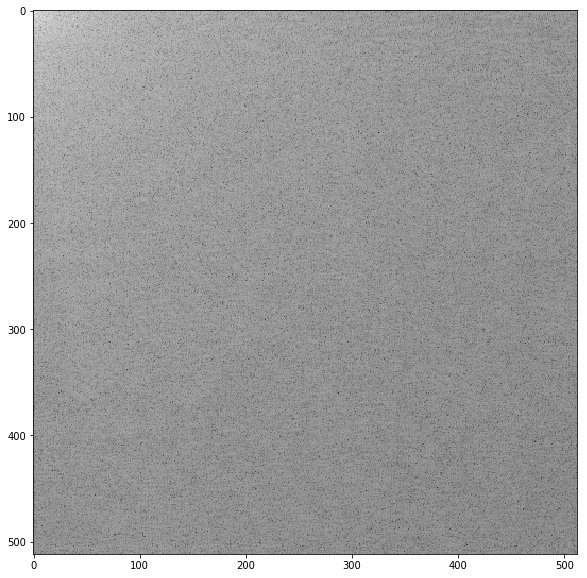

In [61]:
i = data.astronaut()
i = color.rgb2gray(i)

imshow(i, cmap=cm.gray)

# I=dct(i)
# I = I.T

# I=dct(i)
# I = I.T

I = dct(dct(i).T).T

figure()
imshow( log(abs(I)),cmap=cm.gray )

Użyj DCT do dokonania tych samych operacji filtrowania w dziedzinie częstotliwości, jak w przypadku FFT w ćwiczeniach powyżej. Uważaj żeby dokonać poprawnej procedury odwracania liczenia DCT2.

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


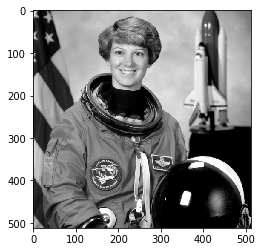

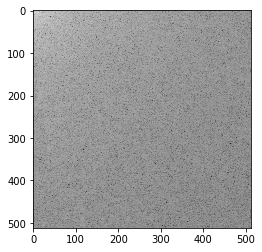

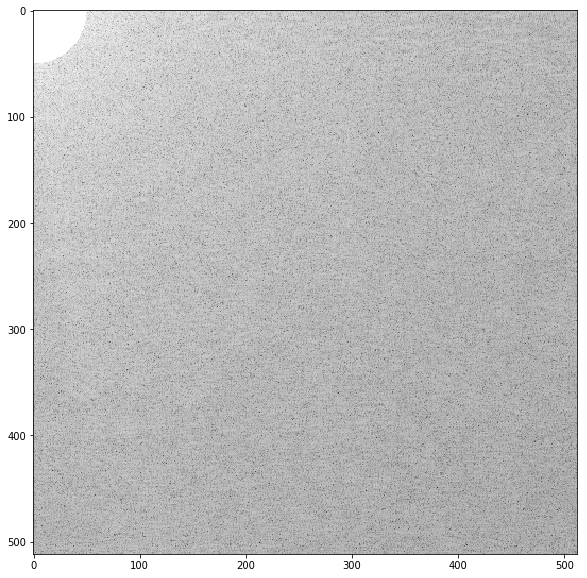

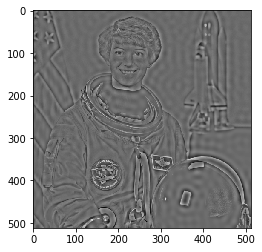

In [64]:
i = data.astronaut()
i = color.rgb2gray(i)

imshow(i, cmap=cm.gray)

I = dct(dct(i).T).T

figure()
imshow( log(abs(I)),cmap=cm.gray )

# mask
L = 50
d = morphology.disk(L)
m = zeros(I.shape)
m[:L+1, :L+1] = d[L:,L:]

m=1-m
I = I*m

figure( figsize=(10,10))
imshow( log(abs(I)),cmap=cm.gray )

i = idct(idct(I.T).T)

figure()
imshow(i,cmap=cm.gray)


# Splot w obrazie

Splot w obrazach 2D jest podobny do sygnałów akustycznych 1D. Metodę tą można s powodzeniem stosować do filtrowania obrazu i wszystkie inne reguły (np. dotyczące dziedziny częstotliwości) mają takie same odzwericiedlenie jak w sygnałach 1D.

Zacznijmy więc od najprostszego filtru: uśredniającego. Filtry do splotu 2D mają 2 wymiary (wysokość i szerokość). Zrób fitr uśredniający 10x10 i dokonaj splotu z wybranym obrazem (metoda *scipy.signal.convolve2d*).

Jaka jest charakterystyka tego filtru? Co on robi?

(512, 512)
(10, 10)
(521, 521)


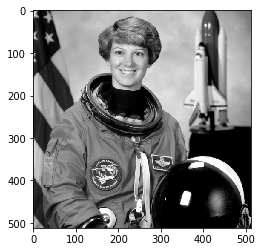

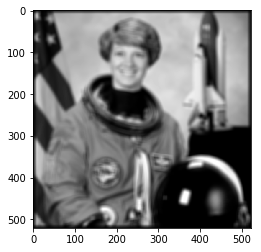

In [71]:
N = 10
# k = ones((N,N))/N**2
k = ones((N,N))
k /= k.sum()

i = data.astronaut()
i = color.rgb2gray(i)

imshow(i, cmap=cm.gray)

I = convolve2d(i,k)

print(i.shape)
print(k.shape)
print(I.shape)


figure()
imshow(I,cmap=cm.gray)

Zamiast filtru uśredniającego, zastosuj filtr *Gaussowski*. Jaką on ma charakterystykę? Dlaczeo jest lepszy od uśredniającego?

Żeby zrobić Gaussowski filtr 2D, trzeba:
* zrobić filtr 1D o długości N
* zmienić go na macierz 2D (1xN)
* dokonać mnożenia tej macierzy przez jej transponowaną wersję

(20,)
(1, 20)
(20, 20)


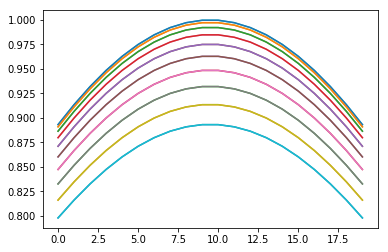

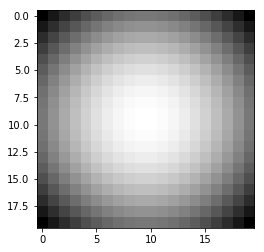

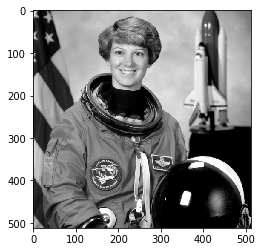

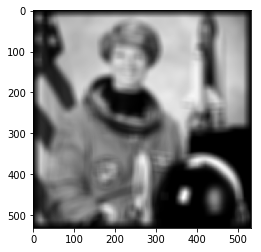

In [91]:
N = 20
S = 20
k = gaussian(N,S)
print(k.shape)
k = expand_dims(k,0)
print(k.shape)
k=k*k.T
print(k.shape)

plot(k)

figure()
imshow(k, cmap=cm.gray)

k /= k.sum()



i = data.astronaut()
i = color.rgb2gray(i)

figure()
imshow(i, cmap=cm.gray)

I = convolve2d(i,k)
figure()
imshow(I, cmap=cm.gray)

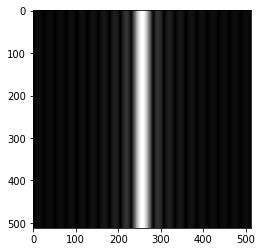

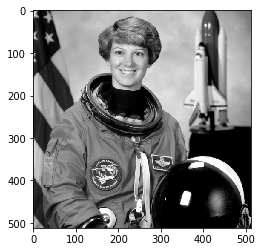

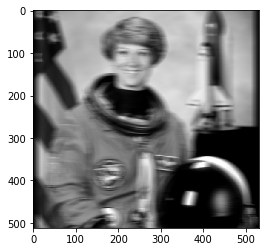

In [96]:
N = 20
k = gaussian(N,N)
k = expand_dims(k,0)
k /= k.sum()

l = zeros((512,512))
l[:k.shape[0],:k.shape[1]]=k
K=fft.fft2(l)
K=fft.fftshift(K)

imshow((abs(K)),cmap=cm.gray)

i = data.astronaut()
i = color.rgb2gray(i)

I = convolve2d(i,k)

figure()
imshow(i, cmap=cm.gray)

figure()
imshow(I, cmap=cm.gray)

Zrób filtr używając następujących wartości:

| | | |
|-|-|-|
| -1 | -1 | -1 |
| -1 | 8 | -1 |
| -1 | -1 | -1 |

Co robi ten filtr?

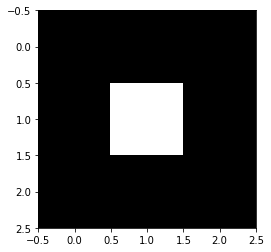

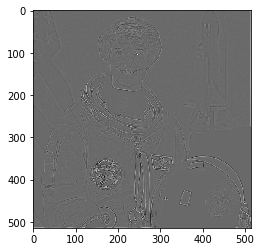

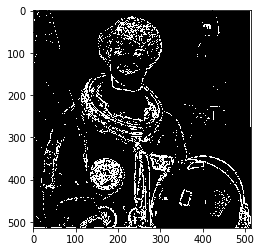

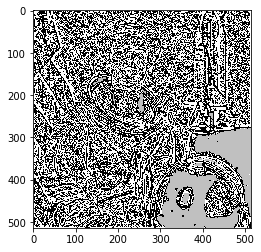

In [110]:
k = ones((3,3))*-1
k[1,1] = 8


l = zeros((512,512))
l[:k.shape[0],:k.shape[1]]=k
K=fft.fft2(l)
K=fft.fftshift(K)

figure()
imshow(k, cmap=cm.gray)


i = data.astronaut()
i = color.rgb2gray(i)


I = convolve2d(i,k)

figure()
imshow(I, cmap=cm.gray)

Ih = convolve2d(i,k)
Iv = convolve2d(i,k.T)
I=sqrt(Ih**2+Iv**2)

I=I>0.5
figure()
imshow(I, cmap=cm.gray)

Ia = arctan2(Iv,Ih)
figure()
imshow(Ia, cmap=cm.gray)

Łatwo można policzyć filtr który liczy pochodną z obrazu w poziomie albo pionie. Jak?

Zrób filtr Sobela-Feldmana zdefiniowanego w ten sposób:

| | | |
|-|-|-|
| -1 | -2 | -1 |
| 0 | 0 | 0 |
| 1 | 2 | 1 |

Oraz jego transponowaną wersję (odpowiadającą pochodnej według innej osi).

Narysuj obydwie pochodne obrazu, a potem ich moc i kąt używając tych samych wzorów jak w przypadku liczenia widma.

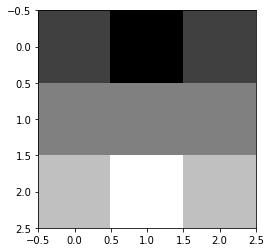

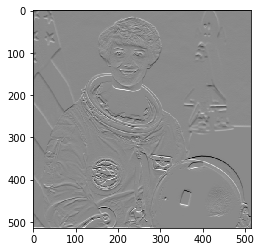

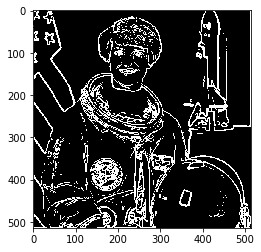

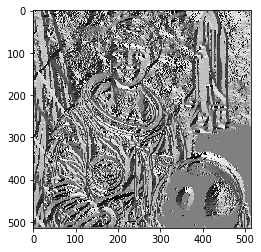

In [106]:
# k = ones((3,3))*-1
# k[1,1] = 8

k = array([[-1,-2,-1],[0,0,0],[1,2,1]])

l = zeros((512,512))
l[:k.shape[0],:k.shape[1]]=k
K=fft.fft2(l)
K=fft.fftshift(K)

figure()
imshow(k, cmap=cm.gray)


i = data.astronaut()
i = color.rgb2gray(i)


I = convolve2d(i,k)

figure()
imshow(I, cmap=cm.gray)

Ih = convolve2d(i,k)
Iv = convolve2d(i,k.T)
I=sqrt(Ih**2+Iv**2)

I=I>0.5
figure()
imshow(I, cmap=cm.gray)

Ia = arctan2(Iv,Ih)
figure()
imshow(Ia, cmap=cm.gray)

# Praca domowa

## 1. Filtrowanie w dziedzinie częstotliwości

Wczytaj obraz *noisecam.png*.

Jest to klatka ze szkolnego systemu monitoringu. Ze względu na oszczędności w instalacji użyto nieekranowanych kabli UTP do przesyłania zarówno sygnału jak i zasilania poszczególnych kamer (wskazówka!). Zrób filtrowanie w dziedzinie częstotliwości żeby usunąć szum na obrazie.

In [109]:
%ls

AIR_1_4@                     Lab2_dz_sygnały.ipynb         sawtooth.png
brickwall.jpg                Lab3_dz_splot.ipynb           square.png
dsc0085.jpg                  Lab4_dz_Fourier.ipynb         stego.bmp
dsc0085.jpg.1                Lab5_dz_Probkowanie.ipynb     step.png
img1.gif                     Lab6_dz_DFT_FFT_STFT.ipynb    test
img.png                      Lab7_dz_Filtry_cyfrowe.ipynb  text.png
impulse.png                  Lab8_dz_obrazy.ipynb          triangle.png
joker.bmp                    Lab9_dz_punkt.ipynb           Wprowadzenie.ipynb
Lab10_dz_obrazy_trans.ipynb  noisecam.png                  zdanie.wav@


## 2. Wyrównanie tekstu

Ktoś źle zeskanował ten tekst i obraz *text.png* jest bardzo przechylony:

Użyj analizy częstotliwości obrazu żeby znaleźć kąt przechylenia obrazu. Jeśli chcesz, użyj metody *skimage.transform.rotate* żeby skorygować zdjęcie używając policzonych wartości.

## 3. Analiza obrazu

Wczytaj obraz *brickwall.jpg*.

Użyj analizy częstotliwości żeby oszacować ilość cegieł na zdjęciu. Znajdź na widmie punkty odpowiadające wierszom i kolumnom na zdjęciu. Pokaż jak te punkty odpowiadają ilości cegieł. Pomnoż te wartości żeby podać szacunkową ilość cegieł.